Maybe display an app here to show where the tutorial takes them:

```
from app import *
ui
```

# day 3 tutorial

Run the whole notebook by selecting "Restart & Run All" from the "Kernel" menu (above).

**TO RUN LOCALLY users need to install ipywidgets and ipyleaflet and enable the widget extension for jupyter:**
```
pip install ipywidgets
pip install ipyleaflet
jupyter nbextension enable --py widgetsnbextension
```
**notes:**
* old code that Yaxing might still want to use is at bottom


In [1]:
import os                            # core py3 
import json
from io import StringIO

import requests                      # data
import numpy as np
import pandas as pd
import xarray as xr
from shapely.geometry import shape

import ipywidgets as wg              # widgets and plotting
import ipyleaflet as mwg 
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

url = "https://daac.ornl.gov/cgi-bin/viz/download.pl?" # SMV
auth = dict(ORNL_DAAC_USER_NUM=str(32863))             # Jack
hstyle = {"color": "white", "fillOpacity": 0.6}

## SMV Datasets

[*docs/smvdatasets.csv*](docs/smvdatasets.csv) is a copy of the datasets table from the [SMV User Guide](https://daac.ornl.gov/soilmoisture/guide.html). Read it into a `pandas` data frame and display it:

In [2]:
smvds = pd.read_csv("docs/smvdatasets.csv", index_col="dataset", header=0)
smvds

,source,type,units,description,soil_zone,soil_depth,native_res,time_coverage
dataset,,,,,,,,
SoilSCAPE_surface,SoilSCAPE,in situ,m3/m3,Mean vol (%) soil moisture at 0-5 cm,surface,"5, 20, 50 cm",point,2011-present
SoilSCAPE_rootzone,SoilSCAPE,in situ,m3/m3,Mean vol (%) soil moisture at 0-100 cm,rootzone,"5, 20, 50 cm",point,2011-present
AirMOSS_in-ground_surface,AirMOSS,in situ,m3/m3,Mean vol (%) soil moisture at 0-5 cm,surface,"2, 5, 10, 20, 40, 60, 80 cm",point,2012-2015
AirMOSS_in-ground_rootzone,AirMOSS,in situ,m3/m3,Mean vol (%) soil moisture at 0-100 cm,rootzone,"2, 5, 10, 20, 40, 60, 80 cm",point,2012-2015
COSMOS_surface,COSMOS,in situ,m3/m3,Mean vol (%) soil moisture at 0-5 cm,surface,0-30 cm,point,2008-present
COSMOS_rootzone,COSMOS,in situ,m3/m3,Mean vol (%) soil moisture at 0-100 cm,rootzone,0-30 cm,point,2008-present
AirMOSS_L2_3_surface,AirMOSS,airborne,m3/m3,Mean vol (%) soil moisture at 0 cm,surface,"0, 10, 30 cm",90-m,2012-2015
AirMOSS_L2_3_rootzone,AirMOSS,airborne,m3/m3,Mean vol (%) soil moisture at 0-30cm,rootzone,"0, 10, 30 cm",90-m,2012-2015
AirMOSS_L4_rootzone,AirMOSS,airborne,m3/m3,Mean vol (%) soil moisture at 0-100cm,rootzone,"0-10, 10-40, 40-100 cm",90-m,2012-2015


Example from file:

In [3]:
df = pd.read_csv("docs/daily-smap-ORNL-DAAC-PccIuo.txt", header=4, index_col="time")
df.index = pd.to_datetime(df.index)        

df.head(5)

,SoilSCAPE_surface,SoilSCAPE_rootzone,AirMOSS_L2_3_surface,AirMOSS_L2_3_rootzone,AirMOSS_L4_rootzone,SMAP_surface,SMAP_rootzone,NEE_mean,GPP_mean,prcp,...,CRN_surface,CRN_rootzone,SCAN_surface,SCAN_rootzone,SNOTEL_surface,SNOTEL_rootzone,GRACE_surface_pctl,GRACE_rootzone_pctl,FLUXNET_surface,FLUXNET_rootzone
time,,,,,,,,,,,,,,,,,,,,,
2012-09-20,;;,;;,;nan;,;7.2;,4.86;7.16;9.2,;;,;;,;;,;;,;;,...,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;
2012-09-21,;;,;;,;;,;;,9.55;9.6;9.67,;;,;;,;;,;;,;;,...,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;
2012-09-22,;;,;;,;;,;;,9.34;9.49;9.57,;;,;;,;;,;;,;;,...,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;
2012-09-23,;;,;;,;;,;;,9.14;9.38;9.52,;;,;;,;;,;;,;;,...,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;
2012-09-24,;;,;;,;;,;;,8.95;9.27;9.49,;;,;;,;;,;;,;;,...,;;,;;,;;,;;,;;,;;,;19.59;,;36.24;,;;,;;


In [4]:
data = df["AirMOSS_L4_rootzone"].str.split(";", n=2, expand=True)
data = data.replace('', np.nan)                                         # set '' to nan
data = data.astype(float)                                               # set all to float
data.columns = ["AirMOSS_L4_rootzone_"+s for s in ["mean","min","max"]]

data.head(5)

,AirMOSS_L4_rootzone_mean,AirMOSS_L4_rootzone_min,AirMOSS_L4_rootzone_max
time,,,
2012-09-20,4.86,7.16,9.20
2012-09-21,9.55,9.60,9.67
2012-09-22,9.34,9.49,9.57
2012-09-23,9.14,9.38,9.52
2012-09-24,8.95,9.27,9.49


plot it:

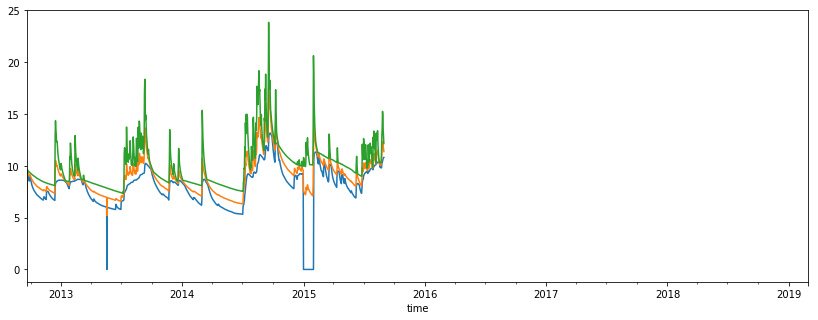

In [5]:
plt.rcParams['figure.figsize'] = [14, 5]

data["AirMOSS_L4_rootzone_mean"].plot()
data["AirMOSS_L4_rootzone_min"].plot()
data["AirMOSS_L4_rootzone_max"].plot()

---------------------------------------------
## Read USFS data from GeoJSON

The original dataset was a shapefile, but we reprojected and saved as GeoJSON using *ogr2ogr* from the GDAL/OGR binaries package available at OSGeo.

Let's open the GeoJSON and reorganize it as a pandas data frame. Read to a dictionary with `json.load` and print the first feature:

In [6]:
with open("sites/Sites_lf_geo.json", "r") as f:
    shapes = json.load(f)

features = shapes["features"]

feat = features[0]
feat["properties"]["id"] = 0
feat["properties"]["style"] = {"weight": 1, "fillOpacity": 0.5}

prop = feat["properties"]
prop

{'AREA': 509937500.0,
 'COUNT': 8159,
 'Count_1': 8270.0,
 'Count_10': 8274.0,
 'Count_11': 8253.0,
 'Count_12': 8256.0,
 'Count_13': 8263.0,
 'Count_14': 8268.0,
 'Count_15': 8262.0,
 'Count_16': 8234.0,
 'Count_17': 8263.0,
 'Count_18': 8268.0,
 'Count_19': 8245.0,
 'Count_2': 8269.0,
 'Count_20': 8224.0,
 'Count_21': 8272.0,
 'Count_22': 8271.0,
 'Count_23': 8252.0,
 'Count_24': 8259.0,
 'Count_25': 8269.0,
 'Count_26': 8249.0,
 'Count_27': 8240.0,
 'Count_28': 8238.0,
 'Count_29': 8247.0,
 'Count_3': 8270.0,
 'Count_30': 8234.0,
 'Count_31': 8268.0,
 'Count_32': 8266.0,
 'Count_33': 8260.0,
 'Count_34': 8219.0,
 'Count_35': 8142.0,
 'Count_4': 8271.0,
 'Count_5': 8269.0,
 'Count_6': 8257.0,
 'Count_7': 8266.0,
 'Count_8': 8273.0,
 'Count_9': 8272.0,
 'DISTRICTNA': 'Douglas Ranger District',
 'DISTRICTNU': '01',
 'DISTRICTOR': '030501',
 'FID_1': 60,
 'FORESTNAME': 'Coronado National Forest',
 'FORESTNUMB': '05',
 'GIS_ACRES': 434025.2,
 'MAJORITY': -51,
 'MAX': 34,
 'MEAN': -42.650

A feature's properties (AKA attributes) are stored in the "properties" element of the GeoJSON object:

In [7]:
geom = feat["geometry"]         # each feature has a geom
geom

{'coordinates': [[[[-109.2462605499999, 32.05433095000002],
    [-109.24626015999993, 32.05070238000009],
    [-109.24625976999991, 32.04707352000008],
    [-109.2462594, 32.04344467000003],
    [-109.2462586499999, 32.03982309000004],
    [-109.24625792999993, 32.03620154000007],
    [-109.24625717999992, 32.032579690000105],
    [-109.24625642999995, 32.02895783000008],
    [-109.24625542999993, 32.02532931000008],
    [-109.24625441999994, 32.02170079000003],
    [-109.24625341999993, 32.018071990000045],
    [-109.24625241999995, 32.014443200000116],
    [-109.24625163999995, 32.010815260000065],
    [-109.24625083999995, 32.00718729000005],
    [-109.24625005999995, 32.003559080000066],
    [-109.2462492499999, 31.999930830000025],
    [-109.24624877999995, 31.996307030000132],
    [-109.24624830999991, 31.992683230000054],
    [-109.24199216999992, 31.99268452000005],
    [-109.23773602999992, 31.992685700000088],
    [-109.23773580999992, 31.989061420000027],
    [-109.237735589

Data:

In [8]:
stats = pd.DataFrame({
    "mean": [v for k,v in prop.items() if "MEAN" in k],
    "std": [v for k,v in prop.items() if "STD" in k]})

stats.head(5)

,mean,std
0,1287.296422,804.054903
1,-42.650570,813.900927
2,1182.049220,557.405375
3,1103.333978,721.369645
4,1223.085441,681.052385


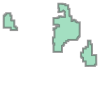

In [9]:
sgeom = shape(geom)     # Shapely.geometry.shape
bnds = sgeom.bounds
cent = sgeom.centroid

sgeom

Leaflet poly:

In [10]:
bmap = mwg.basemap_to_tiles(mwg.basemaps.Esri.WorldImagery)
poly = mwg.GeoJSON(data=feat)
points = mwg.LayerGroup()

m1 = mwg.Map(
    layers=(bmap, poly, points,), 
    center=(cent.y, cent.x), 
    zoom=9)

m1

Map(basemap={'max_zoom': 19, 'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'attribution': 'Map …

# EASE Grid

Spatial queries to the Soil Moisture Visualizer return data corresponding to 9- by 9-km cells within the EASE grid system. Read about the EASE grid at the NSIDC's web page: https://nsidc.org/data/ease

The next two cells show how to select arrays of EASE grid sample points that fall within an input polygon so that they can be used to submit a series of data requests to the SMV. We will combine everything into one more function (**get_ease**) to use later in our batch processing routine.
      
**Two binary files contain the arrays corresponding to global EASE grid centroid latitudes and longitudes, respectively. Open the two files and read into `numpy` arrays:**

In [11]:
lats = np.fromfile("docs/EASE2_M09km.lats.3856x1624x1.double", dtype=np.float64).flatten() 
lons = np.fromfile("docs/EASE2_M09km.lons.3856x1624x1.double", dtype=np.float64).flatten()
crds = np.dstack((lats,lons))[0]
crds

array([[  84.6564188 , -179.9533195 ],
       [  84.6564188 , -179.85995851],
       [  84.6564188 , -179.76659751],
       ...,
       [ -84.6564188 ,  179.76659751],
       [ -84.6564188 ,  179.85995851],
       [ -84.6564188 ,  179.9533195 ]])

Select a 2-dimensional array of EASE grid centroids using some arbitrary latitude, longitude bounds:

In [12]:
bnds = sgeom.bounds 
bnds

(-110.04372394999993,
 31.382951900000045,
 -108.92062104999994,
 32.13746836000006)

Get the points inside the polygon:

In [13]:
ease = crds[(bnds[1]<lats)&(lats<bnds[3])&(bnds[0]<lons)&(lons<bnds[2])]
ease

array([[  32.08029092, -110.02593361],
       [  32.08029092, -109.93257261],
       [  32.08029092, -109.83921162],
       [  32.08029092, -109.74585062],
       [  32.08029092, -109.65248963],
       [  32.08029092, -109.55912863],
       [  32.08029092, -109.46576763],
       [  32.08029092, -109.37240664],
       [  32.08029092, -109.27904564],
       [  32.08029092, -109.18568465],
       [  32.08029092, -109.09232365],
       [  32.08029092, -108.99896266],
       [  31.99730645, -110.02593361],
       [  31.99730645, -109.93257261],
       [  31.99730645, -109.83921162],
       [  31.99730645, -109.74585062],
       [  31.99730645, -109.65248963],
       [  31.99730645, -109.55912863],
       [  31.99730645, -109.46576763],
       [  31.99730645, -109.37240664],
       [  31.99730645, -109.27904564],
       [  31.99730645, -109.18568465],
       [  31.99730645, -109.09232365],
       [  31.99730645, -108.99896266],
       [  31.91439556, -110.02593361],
       [  31.91439556, -1

Make some points:

In [14]:
for p in ease:
    pt = mwg.CircleMarker(                       # map point
        location=(p[0],p[1]),                    # lat,lon tuple
        radius=7,                                # in pixels
        stroke=False,
        fill_opacity=0.6,
        fill_color="black")
    points.add_layer(pt)
    
m1

Map(basemap={'max_zoom': 19, 'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'attribution': 'Map …

In [15]:
points.clear_layers()
point = lambda p: shape({"coordinates": p, "type": "Point"})

for p in ease:
    spt = point([p[1], p[0]])
    if sgeom.contains(spt):
        pt = mwg.CircleMarker(
            location=(p[0],p[1]),
            radius=7,
            stroke=False,
            fill_opacity=0.6,
            fill_color="black")
        points.add_layer(pt)

Make a function that includes all of the logic for getting the list of EASE coordinates inside a polygon:

In [16]:
def get_ease(geom):
    """ """
     
    bnds = geom.bounds 
    ease = crds[(bnds[1]<lats)&(lats<bnds[3])&(bnds[0]<lons)&(lons<bnds[2])]
    
    pt = lambda p: shape({"coordinates": p, "type": "Point"})
    inpoly = [[p[0],p[1]] for p in ease if geom.contains(pt([p[1], p[0]]))]
    
    return(inpoly)

# Download a SMV dataset with `requests`
Each request to SMV takes a latitude `&lt` and longitude `&ln`. This request is for (30,-100):       
https://daac.ornl.gov/cgi-bin/viz/download.pl?lt=30&ln=-100&d=smap

In [17]:
lt, ln = ease[0]
url = "https://daac.ornl.gov/cgi-bin/viz/download.pl?lt={lt}&ln={ln}&d=smap".format(lt=lt,ln=ln)
r = requests.get(url, cookies=dict(ORNL_DAAC_USER_NUM="10"))
f = StringIO(r.text)

print("\n".join(f.readlines()[0:10]))

Filename: daily-smap-ORNL-DAAC-XXXXXX

Data_Set_Name: Daily soil moisture and ancillary datasets. Data columns are delineated by commas. The values in each column when separated by semicolons represent the daily range as 'min; mean; max'.

Location: 32.0802909170736, -110.02593360995849

Citation: ORNL DAAC. 2017. Soil Moisture Visualizer. ORNL DAAC, Oak Ridge, Tennessee, USA. http://dx.doi.org/10.3334/ORNLDAAC/1366





time,SoilSCAPE_surface,SoilSCAPE_rootzone,AirMOSS_L2_3_surface,AirMOSS_L2_3_rootzone,AirMOSS_L4_rootzone,SMAP_surface,SMAP_rootzone,NEE_mean,GPP_mean,prcp,tmax,tmin,ET,LST_Day,LST_Night,EVI,AirMOSS_in-ground_surface,AirMOSS_in-ground_rootzone,COSMOS_surface,COSMOS_rootzone,CRN_surface,CRN_rootzone,SCAN_surface,SCAN_rootzone,SNOTEL_surface,SNOTEL_rootzone,GRACE_surface_pctl,GRACE_rootzone_pctl

2002-04-01,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;0.72;,;2.92;

2002-04-02,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;,

The two functions **txt_to_pd** and **split_pd** do everything we've learned to this point: convert the request response to a text object, then a data frame; and parse the columns of strings into three new columns.

In [18]:
def txt_to_pd(response_text):
    """Parses response.text to data frame with date index."""
    
    f = StringIO(response_text)                      # get file from string
    df = pd.read_csv(f, header=4, index_col="time")  # read to df
    df.index = pd.to_datetime(df.index)              # convert index to dates
    
    return(df)


def split_pd(col):
    """Splits pd column by ; and set all values to float, nan."""
    
    df = col.str.split(";",n=2,expand=True)           # split col by ;
    df = df.replace('', np.nan)                       # set '' to nan
    df = df.astype(float)                             # set all to float
    df.columns = ["mean","min","max"]                 # add column names
    
    return(df)

We use these repeatedly to request an process the entire grid:

In [19]:
df = txt_to_pd(r.text)                                # parse response.text to df
dfs = {col: split_pd(df[col]) for col in df.columns}  # loop over cols and split to dfs

dfs["SMAP_rootzone"].tail(5)

,mean,min,max
time,,,
2019-02-21,21.01,21.07,21.09
2019-02-22,20.99,21.63,22.30
2019-02-23,22.06,22.16,22.27
2019-02-24,21.82,21.94,22.01
2019-02-25,21.61,21.74,21.78


## Reformat SMV data as a netCDF-like `xarray.Dataset`
The function below converts SMV outputs to an `xarray.Dataset`. The structure provided by `xarray` is based on pandas, but is better suited (in my opinion) for organizing data that has a spatial component. 

In [20]:
latatts = dict(
    standard_name="latitude",
    long_name="sample latitude",
    units="degrees_north")

lonatts = dict(
    standard_name="latitude",
    long_name="sample latitude",
    units="degrees_north")

s = xr.DataArray(data=[1], dims=["sample"])
latarr = xr.DataArray(data=[lt], coords=[s], dims=["sample"], attrs=latatts)
lonarr = xr.DataArray(data=[ln], coords=[s], dims=["sample"], attrs=lonatts)

latarr

<xarray.DataArray (sample: 1)>
array([32.080291])
Coordinates:
  * sample   (sample) int64 1
Attributes:
    long_name:      sample latitude
    standard_name:  latitude
    units:          degrees_north

Now add one more step to the response -> pandas -> split pandas workflow by making an xarray dataset. Print the SMAP_rootzone dataset:

In [21]:
def pd_to_xr(dataset, df):
    """Makes an xr.Dataset from a pandas column (series) and coords."""
    
    a = smvds.loc[dataset].to_dict()
    x = xr.DataArray(df, name=dataset, attrs=a)
    x = x.rename(dict(dim_1="stat"))
    x.attrs["allnan"] = int(np.isnan(np.nanmean(x.data)))
    
    return(x)


ds = {c: pd_to_xr(c,d) for c,d in dfs.items()}
xds = xr.merge(ds.values())
xds = xds.assign_coords(lat=latarr, lon=lonarr)
xds

<xarray.Dataset>
Dimensions:                     (sample: 1, stat: 3, time: 6175)
Coordinates:
  * time                        (time) datetime64[ns] 2002-04-01 ... 2019-02-25
  * stat                        (stat) object 'mean' 'min' 'max'
  * sample                      (sample) int64 1
    lat                         (sample) float64 32.08
    lon                         (sample) float64 -110.0
Data variables:
    AirMOSS_L2_3_rootzone       (time, stat) float64 nan nan nan ... nan nan nan
    CRN_surface                 (time, stat) float64 nan nan nan ... nan nan nan
    SoilSCAPE_surface           (time, stat) float64 nan nan nan ... nan nan nan
    prcp                        (time, stat) float64 nan nan nan ... nan nan nan
    GPP_mean                    (time, stat) float64 nan nan nan ... 0.767 0.84
    EVI                         (time, stat) float64 nan nan nan ... nan nan nan
    tmin                        (time, stat) float64 nan nan nan ... nan nan nan
    LST_Day       

And this is what a single SMV dataset looks like:

In [22]:
xds["SMAP_surface"]

<xarray.DataArray 'SMAP_surface' (time: 6175, stat: 3)>
array([[  nan,   nan,   nan],
       [  nan,   nan,   nan],
       [  nan,   nan,   nan],
       ...,
       [24.77, 25.96, 27.06],
       [22.31, 23.84, 24.32],
       [20.22, 21.82, 22.35]])
Coordinates:
  * time     (time) datetime64[ns] 2002-04-01 2002-04-02 ... 2019-02-25
  * stat     (stat) object 'mean' 'min' 'max'
Attributes:
    soil_depth:     0-5, 0-100 cm
    native_res:     9000-m 
    units:          m3/m3
    description:    Mean vol (%) soil moisture at 0-5cm 
    source:         SMAP
    time_coverage:  2015-present
    type:           spaceborne
    soil_zone:      surface
    allnan:         0

In some cases it may be advantageous to reorder the dimensions over which the data are arranged. You can transpose the 2-d array with [`xarray.Dataset.transpose`](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.transpose.html):

```
xdsT = xds.transpose()
```

### Get the "plottable" datasets
Remember that we added an attribute to each SMV dataset that indicates whether or not the mean\*min\*max array is entirely nodata: *allnan*

Exclude SMV datasets that are entirely nodata using [`xarray.Dataset.filter_by_attrs`](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.filter_by_attrs.html#xarray.Dataset.filter_by_attrs):

In [24]:
pds = xds.filter_by_attrs(allnan=0)
pds

<xarray.Dataset>
Dimensions:              (stat: 3, time: 6175)
Coordinates:
  * time                 (time) datetime64[ns] 2002-04-01 ... 2019-02-25
  * stat                 (stat) object 'mean' 'min' 'max'
Data variables:
    GPP_mean             (time, stat) float64 nan nan nan ... 0.694 0.767 0.84
    SMAP_rootzone        (time, stat) float64 nan nan nan ... 21.61 21.74 21.78
    GRACE_surface_pctl   (time, stat) float64 nan 0.72 nan nan ... nan nan nan
    SMAP_surface         (time, stat) float64 nan nan nan ... 20.22 21.82 22.35
    NEE_mean             (time, stat) float64 nan nan nan ... -0.048 0.033 0.114
    GRACE_rootzone_pctl  (time, stat) float64 nan 2.92 nan nan ... nan nan nan

We can also filter by any of the other attribute(s) that we assigned from the SMV datasets table:

In [25]:
pds.filter_by_attrs(source="SMAP", soil_zone="rootzone")

<xarray.Dataset>
Dimensions:        (stat: 3, time: 6175)
Coordinates:
  * time           (time) datetime64[ns] 2002-04-01 2002-04-02 ... 2019-02-25
  * stat           (stat) object 'mean' 'min' 'max'
Data variables:
    SMAP_rootzone  (time, stat) float64 nan nan nan nan ... 21.61 21.74 21.78

### Slice/filter using dimension-based criteria
Filter by the *stat* dimension:

In [26]:
pds.sel(stat="mean")

<xarray.Dataset>
Dimensions:              (time: 6175)
Coordinates:
  * time                 (time) datetime64[ns] 2002-04-01 ... 2019-02-25
    stat                 <U4 'mean'
Data variables:
    GPP_mean             (time) float64 nan nan nan nan ... 0.427 0.412 0.694
    SMAP_rootzone        (time) float64 nan nan nan nan ... 22.06 21.82 21.61
    GRACE_surface_pctl   (time) float64 nan nan nan nan nan ... nan nan nan nan
    SMAP_surface         (time) float64 nan nan nan nan ... 24.77 22.31 20.22
    NEE_mean             (time) float64 nan nan nan nan ... -0.03 0.013 -0.048
    GRACE_rootzone_pctl  (time) float64 nan nan nan nan nan ... nan nan nan nan

or the *time* dimension:

In [27]:
time = pds.time.data
print(time[10]); print(time[20])

pds.sel(time=slice(time[10],time[20]))

2002-04-11T00:00:00.000000000
2002-04-21T00:00:00.000000000


<xarray.Dataset>
Dimensions:              (stat: 3, time: 11)
Coordinates:
  * time                 (time) datetime64[ns] 2002-04-11 ... 2002-04-21
  * stat                 (stat) object 'mean' 'min' 'max'
Data variables:
    GPP_mean             (time, stat) float64 nan nan nan nan ... nan nan nan
    SMAP_rootzone        (time, stat) float64 nan nan nan nan ... nan nan nan
    GRACE_surface_pctl   (time, stat) float64 nan nan nan nan ... nan nan nan
    SMAP_surface         (time, stat) float64 nan nan nan nan ... nan nan nan
    NEE_mean             (time, stat) float64 nan nan nan nan ... nan nan nan
    GRACE_rootzone_pctl  (time, stat) float64 nan nan nan nan ... nan nan nan

This feature becomes more useful as you add more dimensions to your dataset. We'll use it to filter across three dimensions once we add more sample locations to this dataset.

In [28]:
pds["SMAP_surface"]

<xarray.DataArray 'SMAP_surface' (time: 6175, stat: 3)>
array([[  nan,   nan,   nan],
       [  nan,   nan,   nan],
       [  nan,   nan,   nan],
       ...,
       [24.77, 25.96, 27.06],
       [22.31, 23.84, 24.32],
       [20.22, 21.82, 22.35]])
Coordinates:
  * time     (time) datetime64[ns] 2002-04-01 2002-04-02 ... 2019-02-25
  * stat     (stat) object 'mean' 'min' 'max'
Attributes:
    soil_depth:     0-5, 0-100 cm
    native_res:     9000-m 
    units:          m3/m3
    description:    Mean vol (%) soil moisture at 0-5cm 
    source:         SMAP
    time_coverage:  2015-present
    type:           spaceborne
    soil_zone:      surface
    allnan:         0

## Make a simple interactive plotting UI
We use the logic above to drive the plotting UI. We can get a list of the attributes to filter by using list comprehension:

In [29]:
source = list(set([pds[d].attrs["source"] for d in pds]))
stype = list(set([pds[d].attrs["type"] for d in pds]))
soil_zone = list(set([pds[d].attrs["soil_zone"] for d in pds]))

print(source); print(stype); print(soil_zone)

['GRACE', 'SMAP']
['spaceborne']
[nan, 'surface', 'rootzone']


GRACE has very few observations, so we don't really need the source filter. And all data are from spaceborne datasets, so the only relevant attribute filter for this dataset is the *soil_zone*:

In [30]:
dates = pds.sel(stat="mean").dropna(dim="time", how="all").time.data
dates = dates.astype('M8[D]')

time_slider = wg.SelectionRangeSlider(
    options=dates, 
    index=(0, len(dates)-1),
    continuous_update=False,
    layout=wg.Layout(width="auto"))

widgets = dict(
    Time=time_slider, 
    By=["None", "year", "month", "week", "day"],
    Zone=['surface', 'rootzone'],
    Mean=True, Min=True, Max=True)

# needs to run twice to switch from inline -->
%matplotlib notebook

Build and display the plot ui:

<IPython.core.display.Javascript object>


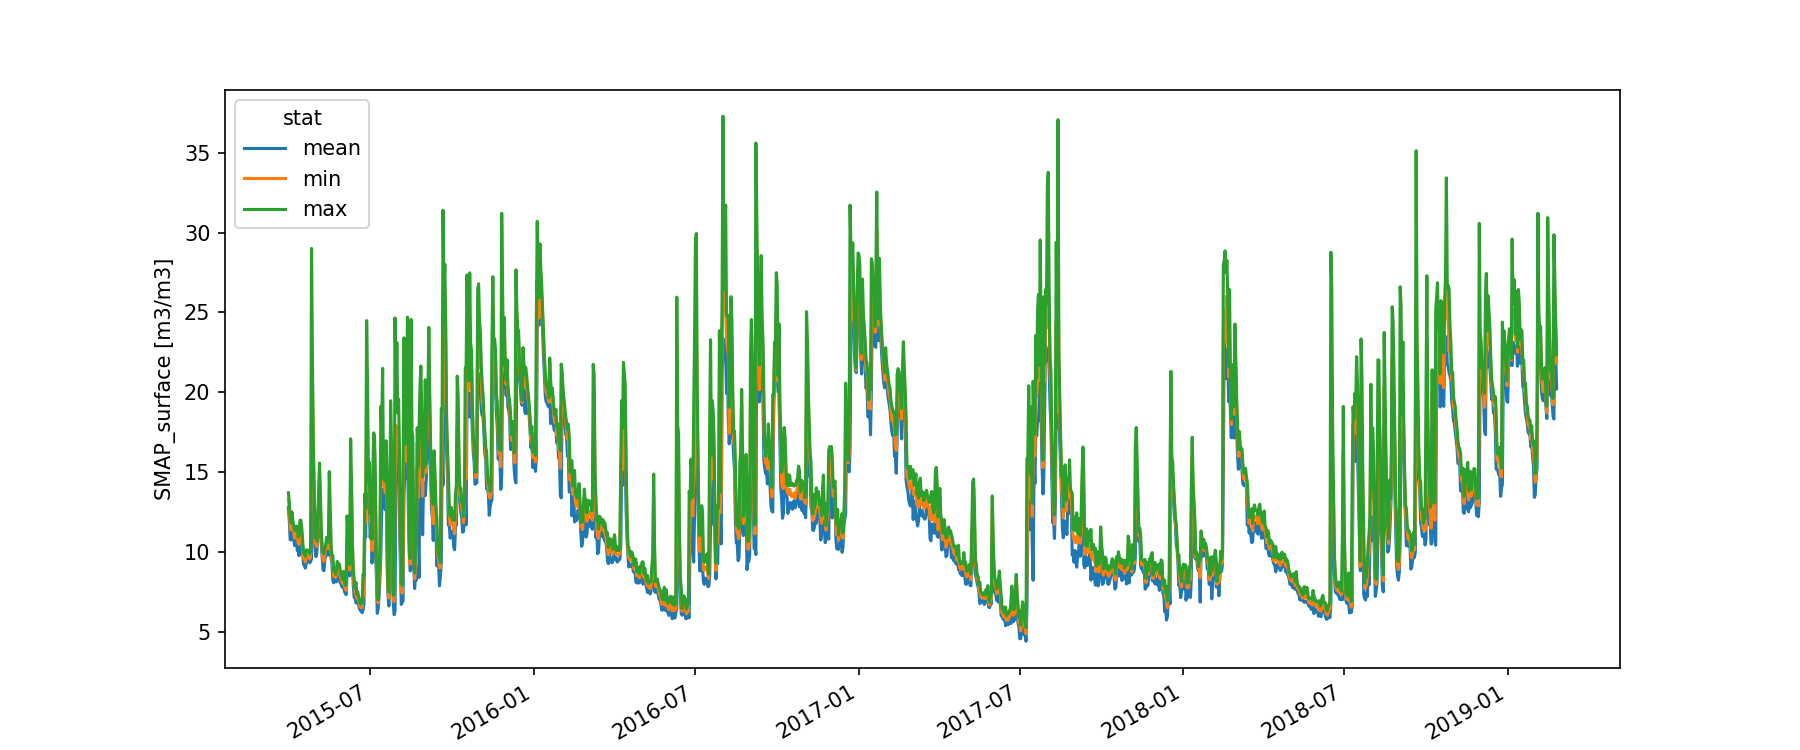

interactive(children=(SelectionRangeSlider(continuous_update=False, description='Time', index=(0, 1427), layou…

In [31]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [12, 5]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


def update(Time, By, Zone, Mean, Min, Max):
    """ """

    stat = [True]*3 if not any([Mean,Min,Max]) else [Mean,Min,Max]
    data = pds.sel(stat=stat)                      # filter by stats
    
    data = data.filter_by_attrs(soil_zone=Zone)    # filter by attributes

    data = data.sel(time=slice(Time[0],Time[1]))   # filter by time;
    
    xaxis = "time" if By == "None" else By         # new plot interval
    if By is not "None":
        data = data.sel(stat="mean")
        data = data.groupby("time."+str(By)).mean()

    ax.clear()                                     # clear plot
    for d in data:                                 # loop over vars
        data[d].plot.line(x=xaxis, ax=ax)          # add line
    fig.canvas.draw()                              # draw 


p = wg.interactive(update, **widgets);
display(p)

## Organize a series of SMV samples into similar structure

The capabilities of xarray aren't obvious until you add a second dimension to the data (excluding the unnecessary *stats* dim). You can do everything we just did with pandas. Let's look at our USFS polygon again with a new map:

In [33]:
points = mwg.LayerGroup()
polys = mwg.LayerGroup(layers=(poly,))
m2 = mwg.Map(layers=(polys, points, bmap), center=(cent.y, cent.x), zoom=9)

m2

Map(basemap={'max_zoom': 19, 'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'attribution': 'Map …

### Container for point samples
`Sample(<id>,<lat>,<lon>)`
* id: an integer id unique to the sample within it's input polygon
* lat, lon: latitude, longitude numerics

In [38]:
url = "https://daac.ornl.gov/cgi-bin/viz/download.pl?"

class Sample(object):

    def __init__(self, i, lat, lon):
        """Inits with id,lat,lon; makes request string, map point."""
        self.id, self.lat, self.lon = i, lat, lon               # id, lat, lon
        self.rurl = url+"lt={0}&ln={1}&d=smap".format(lt,ln)    # request url     
        self.pt = mwg.CircleMarker(                             # map point
            location=(lat,lon),                                 # lat,lon tuple
            radius=7,                                           # in pixels
            stroke=False,
            fill_opacity=0.6,
            fill_color="black")

    def update(self, **kwargs):
        for arg, val in kwargs.items():
            setattr(self.pt, arg, val)
        
    def submit(self):
        """Called by parent. Downloads url. Updates status."""
        self.response = requests.get(self.rurl, cookies=auth)   # submit SMV request
        self.df = txt_to_pd(self.response.text)                 # read to pandas df

Use the function we made before `get_ease` to get a list of EASE points inside the polygon, make a Sample for each, and organize inside a data frame. Print the first five rows of the data frame and display the updated map:

In [39]:
samples = []
for i, pt in enumerate(get_ease(sgeom)):
    s = Sample(i, pt[0], pt[1])                # make a Sample instance
    points.add_layer(s.pt)                     # add map pt to points group
    samples.append((i, pt[0], pt[1], s, None)) # append tuple to the list

samples = pd.DataFrame(                        # convert list of tuples to df
    samples, 
    columns=["id", "lat", "lon", "samp", "xr"])

print(samples.head(5)); m2                     # display

   id        lat         lon                                        samp    xr
0   0  32.080291 -109.372407  <__main__.Sample object at 0x7f574dee4400>  None
1   1  32.080291 -109.279046  <__main__.Sample object at 0x7f574e35e780>  None
2   2  31.997306 -110.025934  <__main__.Sample object at 0x7f574dee47b8>  None
3   3  31.997306 -109.279046  <__main__.Sample object at 0x7f574def6518>  None
4   4  31.914396 -110.025934  <__main__.Sample object at 0x7f574def6668>  None


Map(basemap={'max_zoom': 19, 'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'attribution': 'Map …

Add a couple more widgets purely for aesthetics:

In [40]:
n = len(samples.samp)
progress = wg.IntProgress(value=0, min=0, max=n, description="Progress: ", layout=wg.Layout(width="95%"))

def submit_handler(b):
    submit.disabled = True               # disable submit button
    for samp in samples.samp:            # loop over sample pts
        progress.value += 1              # update progress bar
        samp.update(                     # update point style
            stroke=True, 
            color="white", 
            opacity=0.6)
        samp.submit()                    # download the data

submit = wg.Button(description='Submit', button_style='success')
submit.on_click(submit_handler)

wg.VBox([m2,wg.HBox([submit,progress])])

Hopefully you didn't have any trouble downloading the data. Remember we made the class that binds a map marker to several other items including a pandas data frame that gets created when the sample is retrieved from the SMV.

Check the data frame for sample zero:

In [41]:
samples0 = samples.iloc[0]
print(samples0); samples0.samp.df.tail(5)

id                                               0
lat                                        32.0803
lon                                       -109.372
samp    <__main__.Sample object at 0x7f574dee4400>
xr                                            None
Name: 0, dtype: object


,SoilSCAPE_surface,SoilSCAPE_rootzone,AirMOSS_L2_3_surface,AirMOSS_L2_3_rootzone,AirMOSS_L4_rootzone,SMAP_surface,SMAP_rootzone,NEE_mean,GPP_mean,prcp,...,COSMOS_surface,COSMOS_rootzone,CRN_surface,CRN_rootzone,SCAN_surface,SCAN_rootzone,SNOTEL_surface,SNOTEL_rootzone,GRACE_surface_pctl,GRACE_rootzone_pctl
time,,,,,,,,,,,,,,,,,,,,,
2019-02-21,;;,;;,;;,;;,;;,18.49;19.23;19.62,21.01;21.07;21.09,0.034;0.075;0.116,0.406;0.461;0.517,;;,...,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;
2019-02-22,;;,;;,;;,;;,;;,18.33;25.16;29.87,20.99;21.63;22.3,0.11;0.174;0.238,0.324;0.359;0.394,;;,...,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;
2019-02-23,;;,;;,;;,;;,;;,24.77;25.96;27.06,22.06;22.16;22.27,-0.03;0.004;0.037,0.427;0.515;0.604,;;,...,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;
2019-02-24,;;,;;,;;,;;,;;,22.31;23.84;24.32,21.82;21.94;22.01,0.013;0.05;0.087,0.412;0.493;0.574,;;,...,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;
2019-02-25,;;,;;,;;,;;,;;,20.22;21.82;22.35,21.61;21.74;21.78,-0.048;0.033;0.114,0.694;0.767;0.84,;;,...,;;,;;,;;,;;,;;,;;,;;,;;,;;,;;


This looks familiar. Use the steps that we learned before to convert to an xarray dataset:

In [42]:
s0 = xr.DataArray(data=[samples0.id], dims=["sample"])
y0 = xr.DataArray(data=[samples0.lat], coords=[s0], dims=["sample"], attrs=latatts)
x0 = xr.DataArray(data=[samples0.lon], coords=[s0], dims=["sample"], attrs=lonatts)

df0 = samples0.samp.df                                  # get the sample df
dfs0 = {col: split_pd(df0[col]) for col in df0.columns} # loop over cols and split to dfs
ds0 = {c: pd_to_xr(c,d) for c,d in dfs0.items()}        # make xr datasets for each smv
xds0 = xr.merge(ds0.values())                           # merge to one xr dataset
xds0 = xds0.assign_coords(lat=y0, lon=x0)               # add coordinate arrays sample 
xds0

<xarray.Dataset>
Dimensions:                     (sample: 1, stat: 3, time: 6175)
Coordinates:
  * time                        (time) datetime64[ns] 2002-04-01 ... 2019-02-25
  * stat                        (stat) object 'mean' 'min' 'max'
  * sample                      (sample) int64 0
    lat                         (sample) float64 32.08
    lon                         (sample) float64 -109.4
Data variables:
    AirMOSS_L2_3_rootzone       (time, stat) float64 nan nan nan ... nan nan nan
    CRN_surface                 (time, stat) float64 nan nan nan ... nan nan nan
    SoilSCAPE_surface           (time, stat) float64 nan nan nan ... nan nan nan
    prcp                        (time, stat) float64 nan nan nan ... nan nan nan
    GPP_mean                    (time, stat) float64 nan nan nan ... 0.767 0.84
    EVI                         (time, stat) float64 nan nan nan ... nan nan nan
    tmin                        (time, stat) float64 nan nan nan ... nan nan nan
    LST_Day       

While we're at it, wrap all of that up in a function to apply to all of the samples:

In [43]:
def get_sample_xr(samp):
    """ """
    
    # get sample, lat, lon xr arrays
    s = xr.DataArray(data=[samp.id], dims=["sample"])
    y = xr.DataArray(data=[samp.lat], coords=[s], dims=["sample"], attrs=latatts)
    x = xr.DataArray(data=[samp.lon], coords=[s], dims=["sample"], attrs=lonatts)

    df = samp.df                                         # get the sample df
    dfs = {col: split_pd(df[col]) for col in df.columns} # loop over cols and split to dfs
    ds = {c: pd_to_xr(c,d) for c,d in dfs.items()}       # make xr datasets for each smv
    xds = xr.merge(ds.values())                          # merge to one xr dataset
    xds = xds.assign_coords(lat=y, lon=x)                # add coordinate arrays
    
    return(xds)
    

for ix, row in samples.iterrows():                       # loop over samples df
    samples.at[ix, "xr"] = get_sample_xr(row.samp)       # add xr dataset to col
    
samples

,id,lat,lon,samp,xr
0,0,32.080291,-109.372407,<__main__.Sample object at 0x7f574dee4400>,"[AirMOSS_L2_3_rootzone, CRN_surface, SoilSCAPE..."
1,1,32.080291,-109.279046,<__main__.Sample object at 0x7f574e35e780>,"[AirMOSS_L2_3_rootzone, CRN_surface, SoilSCAPE..."
2,2,31.997306,-110.025934,<__main__.Sample object at 0x7f574dee47b8>,"[AirMOSS_L2_3_rootzone, CRN_surface, SoilSCAPE..."
3,3,31.997306,-109.279046,<__main__.Sample object at 0x7f574def6518>,"[AirMOSS_L2_3_rootzone, CRN_surface, SoilSCAPE..."
4,4,31.914396,-110.025934,<__main__.Sample object at 0x7f574def6668>,"[AirMOSS_L2_3_rootzone, CRN_surface, SoilSCAPE..."
5,5,31.914396,-109.932573,<__main__.Sample object at 0x7f574def6320>,"[AirMOSS_L2_3_rootzone, CRN_surface, SoilSCAPE..."
6,6,31.914396,-109.372407,<__main__.Sample object at 0x7f574def65c0>,"[AirMOSS_L2_3_rootzone, CRN_surface, SoilSCAPE..."
7,7,31.914396,-109.279046,<__main__.Sample object at 0x7f574df1dcc0>,"[AirMOSS_L2_3_rootzone, CRN_surface, SoilSCAPE..."
8,8,31.914396,-109.185685,<__main__.Sample object at 0x7f574def6be0>,"[AirMOSS_L2_3_rootzone, CRN_surface, SoilSCAPE..."
9,9,31.831558,-109.932573,<__main__.Sample object at 0x7f574def6cf8>,"[AirMOSS_L2_3_rootzone, CRN_surface, SoilSCAPE..."


Check sample ten:

In [44]:
samples.iloc[10].xr

<xarray.Dataset>
Dimensions:                     (sample: 1, stat: 3, time: 6175)
Coordinates:
  * time                        (time) datetime64[ns] 2002-04-01 ... 2019-02-25
  * stat                        (stat) object 'mean' 'min' 'max'
  * sample                      (sample) int64 10
    lat                         (sample) float64 31.83
    lon                         (sample) float64 -109.4
Data variables:
    AirMOSS_L2_3_rootzone       (time, stat) float64 nan nan nan ... nan nan nan
    CRN_surface                 (time, stat) float64 nan nan nan ... nan nan nan
    SoilSCAPE_surface           (time, stat) float64 nan nan nan ... nan nan nan
    prcp                        (time, stat) float64 nan nan nan ... nan nan nan
    GPP_mean                    (time, stat) float64 nan nan nan ... 0.767 0.84
    EVI                         (time, stat) float64 nan nan nan ... nan nan nan
    tmin                        (time, stat) float64 nan nan nan ... nan nan nan
    LST_Day      

Hopefully, if we organized the data correctly, we can concatenate along the sample dimension:

In [45]:
xds0 = xr.concat(samples.xr.tolist(), "sample")
xds0

<xarray.Dataset>
Dimensions:                     (sample: 23, stat: 3, time: 6175)
Coordinates:
  * time                        (time) datetime64[ns] 2002-04-01 ... 2019-02-25
  * stat                        (stat) object 'mean' 'min' 'max'
  * sample                      (sample) int64 0 1 2 3 4 5 ... 17 18 19 20 21 22
    lat                         (sample) float64 32.08 32.08 32.0 ... 31.5 31.42
    lon                         (sample) float64 -109.4 -109.3 ... -109.0 -109.0
Data variables:
    AirMOSS_L2_3_rootzone       (sample, time, stat) float64 nan nan ... nan nan
    CRN_surface                 (sample, time, stat) float64 nan nan ... nan nan
    SoilSCAPE_surface           (sample, time, stat) float64 nan nan ... nan nan
    prcp                        (sample, time, stat) float64 nan nan ... nan nan
    GPP_mean                    (sample, time, stat) float64 nan nan ... 0.84
    EVI                         (sample, time, stat) float64 nan nan ... nan nan
    tmin         

Save as a netCDF. The dataset needs another variable and some special attributes to comply with CF (explain CF):
* a variable that describes the sequence that makes up the sample dimension
* a dataset-level attribute that inidcates the dataset's *featureType*

In [46]:
# loop over sample dim sequence and make strings like: "sample##"
sample_name_data = ["sample"+("%02d" % s) for s in xds0.sample.data]

xds0["sample_name"] = xr.DataArray(        # make an xr array
    data=sample_name_data, 
    dims=["sample"], 
    attrs=dict(                            # cf attributes
        long_name="sample name", 
        cf_role="timeseries_id"))

xds0.attrs.update({
    "convention": "CF-1.6", 
    "featureType": "timeSeries",
    "source": "Soil Moisture Visualizer",
    "institution": "Oak Ridge National Laboratory Distributed Active Archive Center"})

xds0

<xarray.Dataset>
Dimensions:                     (sample: 23, stat: 3, time: 6175)
Coordinates:
  * sample                      (sample) int64 0 1 2 3 4 5 ... 17 18 19 20 21 22
  * time                        (time) datetime64[ns] 2002-04-01 ... 2019-02-25
  * stat                        (stat) object 'mean' 'min' 'max'
    lat                         (sample) float64 32.08 32.08 32.0 ... 31.5 31.42
    lon                         (sample) float64 -109.4 -109.3 ... -109.0 -109.0
Data variables:
    AirMOSS_L2_3_rootzone       (sample, time, stat) float64 nan nan ... nan nan
    CRN_surface                 (sample, time, stat) float64 nan nan ... nan nan
    SoilSCAPE_surface           (sample, time, stat) float64 nan nan ... nan nan
    prcp                        (sample, time, stat) float64 nan nan ... nan nan
    GPP_mean                    (sample, time, stat) float64 nan nan ... 0.84
    EVI                         (sample, time, stat) float64 nan nan ... nan nan
    tmin         

Save with [`xarray.Dataset.to_netcdf`](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.to_netcdf.html#xarray.Dataset.to_netcdf):

In [47]:
xds0.to_netcdf("23samples.nc")

## Extend the plotting UI
We probably have more options for filters with a dataset this size. Let's see:

In [48]:
xpds = xds0.filter_by_attrs(allnan=0)
xpds

<xarray.Dataset>
Dimensions:              (sample: 23, stat: 3, time: 6175)
Coordinates:
  * time                 (time) datetime64[ns] 2002-04-01 ... 2019-02-25
    lat                  (sample) float64 32.08 32.08 32.0 ... 31.5 31.5 31.42
    lon                  (sample) float64 -109.4 -109.3 -110.0 ... -109.0 -109.0
  * sample               (sample) int64 0 1 2 3 4 5 6 7 ... 16 17 18 19 20 21 22
  * stat                 (stat) object 'mean' 'min' 'max'
Data variables:
    GPP_mean             (sample, time, stat) float64 nan nan nan ... 0.767 0.84
    SMAP_rootzone        (sample, time, stat) float64 nan nan ... 21.74 21.78
    GRACE_surface_pctl   (sample, time, stat) float64 nan 0.72 nan ... nan nan
    SMAP_surface         (sample, time, stat) float64 nan nan ... 21.82 22.35
    NEE_mean             (sample, time, stat) float64 nan nan ... 0.033 0.114
    GRACE_rootzone_pctl  (sample, time, stat) float64 nan 2.92 nan ... nan nan
Attributes:
    convention:   CF-1.6
    source:  

## Crap! No other SMV datasets for this poly. I guess we should let users sample more

## better colors
1. use [`numpy.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to make an array of evenly-spaced values between 0-1 
2. map values to **Set3** in [`matplotlib.cm`](https://matplotlib.org/api/cm_api.html) | [colormap reference](https://matplotlib.org/gallery/color/colormap_reference.html)
3. convert to hexadecimal with [`matplotlib.colors.to_hex`](https://matplotlib.org/api/_as_gen/matplotlib.colors.to_hex.html#matplotlib.colors.to_hex)

In [ ]:
cspace = np.linspace(0.0, 1.0, len(features)) # 1
rgb = cm.Set3(cspace)                         # 2
cols = [colors.to_hex(c[0:3]) for c in rgb]   # 3

cols

MAybe give them the option to import shapefile?
```
with open("sites/Sites_lf_geo.json", "r") as f:
    shapes = json.load(f)
features = shapes["features"]
```


In [ ]:
m1,m2,s0,df0,dfs0,xds0,samples = None,None,None,None,None,None,None
# -----------------------------------------------------------------

site_details = """
{FORESTNAME} ({FORESTNUMB})
{DISTRICTNA} ({DISTRICTNU})
REGION:   {REGION}
ACRES:    {GIS_ACRES}
MIN:      {MIN}
MEDIAN:   {MEDIAN}
MAX:      {MAX}
RANGE:    {RANGE}
SUM:      {SUM}
VARIETY:  {VARIETY}
MINORITY: {MINORITY}
MAJORITY: {MAJORITY}
COUNT:    {COUNT}
"""

out_style = dict(width="30%", height="400px", overflow_y="scroll", overflow_x="hidden", border="1px solid gray")
out = Output(layout=Layout(**out_style))

out.clear_output()
with out:
    print(site_details.format(**lo.site))

In [ ]:
import ipywidgets as wg
import ipyleaflet as mwg
from ipywidgets import Layout, Button, IntProgress, Output, HBox, VBox, HTML
from ipyleaflet import Map, LayerGroup, GeoJSON, CircleMarker

basemap = mwg.basemap_to_tiles(mwg.basemaps.Esri.WorldImagery)
polys = LayerGroup()
points = LayerGroup()

map_center = (32.75, -109)
mapw = Map(
    layers=(basemap, polys, points,), 
    center=map_center, 
    zoom=7, 
    scroll_wheel_zoom=True)

submit = Button( 
    description='Submit', 
    disabled=True, 
    button_style='success')

progress = IntProgress(
    description="Progress: ", 
    layout=Layout(width="95%"))

ui = VBox([mapw, HBox([submit, progress])])

Sample class, few small changes:

In [ ]:
# ----------------------------------------------------------------------------
url = "https://daac.ornl.gov/cgi-bin/viz/download.pl?"

pt_style = dict(radius=7, fill_opacity=0.6, fill_color="black", stroke=False)
pt_status_on = dict(stroke=True, color="white", opacity=0.6)
pt_status_off = dict(stroke=False, color="black", opacity=0.6)


class Sample(object):

    def __init__(self, i, lat, lon):
        """Inits with id,lat,lon; makes request string, map point."""
        self.id, self.lat, self.lon = i, lat, lon
        self.rurl = url+"lt={0}&ln={1}&d=smap".format(lat,lon)  # request url
        self.pt = CircleMarker(location=(lat, lon), **pt_style) # map point
        self.on = False                                         # on/off status

    def update(self, **kwargs):
        for arg, val in kwargs.items():
            setattr(self.pt, arg, val)
    
    def toggle(self, event, type, coordinates):
        opac = 0.1 if self.on else 0.6
        self.update(opacity=opac)
        self.on = False if self.on else True
        
    def submit(self):
        """Called by parent. Downloads url. Updates status."""
        self.response = requests.get(self.rurl, cookies=auth)   # submit SMV request
        self.df = txt_to_pd(self.response.text)                 # read to pandas df
        self.xr = get_sample_xr(self)                           # get xarray dataset
        self.pt.on_click(self.toggle)                           # callback on click
        self.on = True                                          # toggle on

# ----------------------------------------------------------------------------
lyr_style = lambda c: {"color": c, "fillColor": c, "weight": 1, "fillOpacity": 0.4}
lyr_hstyle = {"color": "white", "fillOpacity": 0.8}
statcheck = lambda k: k.split("_")[0] not in ["MEAN","STD","Count", "style"]


def mgeo(i, feat, col):
    feat["properties"].update({
        "id": i, 
        "style": lyr_style(col)})
    return(dict(data=feat, hover_style=lyr_hstyle))


class Layer(object):

    def __init__(self, i, feat, col=None):
        """Inits with id,lat,lon; makes request string, map point."""
        self.id = i
        self.feat = feat
        
        self.sgeom = shape(feat["geometry"])
        self.ease = get_ease(self.sgeom)                        # get ease points
        self.cent = self.sgeom.centroid                         # get centroid
        self.lat, self.lon = self.cent.y, self.cent.x           # get lat, lon
        
        prop = feat["properties"]
        mean = [v for k,v in prop.items() if "MEAN" in k]
        std = [v for k,v in prop.items() if "STD" in k]
        self.stats = pd.DataFrame({"mean": mean, "std": std})
        self.site = {k:v for k,v in prop.items() if statcheck(k)}
        
        lyr = mgeo(i, feat, col)
        self.layer = GeoJSON(**lyr)
        self.layer.on_click(self.toggle)

        self.on, self.dl = False, False                    # on/off, dl status
        
    def update(self, **kwargs):
        for arg, val in kwargs.items():
            setattr(self.layer, arg, val)
    
    def toggle(self, **kwargs):
        """Routine for when a new USFS polygon is selected."""
        if list(kwargs.keys()) != ['event', 'properties']: # check event
            return(None)                                   # skip basemap
        self.on = False if self.on else True               # update status

In [ ]:
prog = lambda m: dict(min=0, max=m, value=0)
xrds = lambda l: xr.concat([s.xr for s in l], "sample")


def get_on_lyrs(column=None):
    """
    Returns a subset of layers df, only "on" layers. If keyword 
    argument 'column' will return only that column.
    """
    on = [i for i,row in layers.iterrows() if row["layer"].on]
    sdf = layers.iloc[on][column] if column else layers.iloc[on]
    return(sdf)


def submit_handler(b):
    """Resets UI and sends requests to SMV when new submit."""
    
    lyron = get_on_lyrs()
    for i, row in lyron.iterrows():             # loop over samples col
        if not row["layer"].dl:                 # if not downloaded yet
            samp = row.samples["samp"].tolist() # get samples
            for a,v in prog(len(samp)).items(): # reset progress bar
                setattr(progress, a, v)
            for s in samp:                      # loop over sample pts
                progress.value += 1             # update progress bar
                s.update(**pt_status_on)        # update style
                s.submit()                      # download the data
            layers.at[i,"xr"] = xrds(samp)      # make xr dataset
            row["layer"].dl = True              # set dl status to True
    submit.disabled = True                      # disable submit button

submit.on_click(submit_handler)

# ----------------------------------------------------------------------------

def layer_click_handler(**kwargs): 
    """
    Routine for when a new USFS polygon is selected. Layer.toggle
    internal updater should evaluate first.
    """
    if list(kwargs.keys()) != ['event', 'properties']: # check event
         return(None)                         # skip basemap
    i = int(kwargs["properties"]["id"])       # set selected poly id
    l = layers.iloc[i]                        # get row for selected
    lo = l.layer                              # get Layer class inst
    pteval = points.add_layer if lo.on else points.remove_layer
    pteval(l["points"])                       # update layer status;
    submit.disabled = True if len(get_on_lyrs())==0 else False
    if lo.on:
        mapw.center, mapw.zoom = (lo.lat,lo.lon), 9 # ctr,zoom map

### Make all layers and add to map widget

In [ ]:
sample_header = ["id","lat","lon","samp"]
layer_header = ["id","lat","lon","layer","samples","points","xr"]

layers = []                                   # a temporary list 
for i, feat in enumerate(features):           # loops over USFS poly feats
    
    poly = Layer(i, feat, cols[i])            # get Layer class
    poly.layer.on_click(layer_click_handler)  # set global callback
    polys.add_layer(poly.layer)               # add to polys layer group

    pts, samps = LayerGroup(), []             # points layer group; Samples
    for j, p in enumerate(poly.ease):         # loop over EASE grid pts
        s = Sample(j, p[0], p[1])             # make a Sample instance
        pts.add_layer(s.pt)                   # add to points layer group
        samps.append((j, p[0], p[1], s))      # append tuple to the list  
        
    samps = pd.DataFrame(samps, columns=sample_header)       # samples df
    layers.append((i,poly.lat,poly.lon,poly,samps,pts,None)) # append
    
layers = pd.DataFrame(layers, columns=layer_header)          # layers df

In [ ]:
ui